# Hold on, Why are you leaving? : Analyzing Employee Turnovers!



## 1. Executive Summary

Turnover refers to the number of percentage of workers who leave an organization and are replaced by new employees. 
Turnover rate = Total terminations / Average employee headcount

We are facing the question **how can we reduce employee turnover?**

To help answer this question, the report will analyze the dataset and attempt to relate its variables to Employee turnover. In doing so, we will answer the following questions: 

 - What is the current employee turnover rate?
 - Which department has the highest turnover? What may have caused it?
 - How much influence does salary produce?
 - What variables might influence the employee satisfaction?
 
The report begins with a brief description and cleaning of the data. We then do some exploratory analysis into the current state of events and investigate current turnover rates. Next, we conduct research into the influencing variables using univariate and bivariate analyses. Finally we head into possible mitigating measures..The report concludes with analyses of a few models that may help in the future to analyse the effectiveness of mitigating measures that are applied.

*Different insights are drawn at different levels of the analysis.*


## Summary of Findings & Recommendations

### Findings:
- The current employee turnover rate is about **29.2%**
- The department producing the highest number of employee turnovers is *sales*. Whereas the department producing the least number is *finance*. 
- The highest fractions of turnovers i.e. the number of employees that left / total number of employees is the greatest in the IT department. Followed by logistics and retail and marketing.
- There does not seem to be other significant differences in the mean of other variables between the two departments, according to the line plots. 
- It can be noted from the above boxplots, that the values for average hours a month are slightly over the mean in case of employees left.
- The most signifant attribute differences between the departments producing the most and the least turnovers is *average number of hours worked in a month*

*The five most important variables for predicting employee departure are:*
- satisfaction
- review
- projects
- tenure
- average hours worked in a month

We have found out that employee satisfation is what plays the greatest role in turnovers. 

Furthermore, looking into the factors influencing factors affecting employee satisfaction, the factors seem to be primarily negatively correlated with employee satisfaction. The largest influencing factor being *review*, followed by average hours a month and tenure. 

- **According to the predictions of out Decision Tree Classifier model, the employee turnover rates is 19.81%, decreasing by about 10% when the average number of hours worked are reduced by 10 hours. This is a significant discovery.** 




### Recommendations:

- More emphasis and care should be given to employee satisfaction, before raising salaries. As the amount of employee compensation does not seem to have significant contribution to the turnovers.
- Rather than the absolute numbers of employees that are leaving, focus should be on the respective fractions in each department. 
- The hours worked on average in a month seem to be a contributing factor according to the analysis. Thus, the company should focus on lesser hours, which may result to greater productivity and happiness of employees. 
- The variables should be varied independently and the turnover results tallied and rerun using the models. 
- There still remain further questions to explore such as *Are there potential 'candidate traits' that predict better retention and tenure?, The probable affecting traits might include Education, Expirience and Job movement etc., What are the optimal work hours? What maybe a few talent management strategies?*
- Costs of turnovers should be quantified. 
- Not all turnovers are bad for the company. It could also be useful in some cases as it could lead to acquiring new knowledge and better candidates for career path development. 


In [2]:
import pandas as pd

In [5]:
df = pd.read_csv('data/employee_churn_data.csv')
df

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no
...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [ ]:
df['avg_hrs_month'].mean()

184.661571122434

In [ ]:
df['left'].value_counts()

no     6756
yes    2784
Name: left, dtype: int64

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

<AxesSubplot:xlabel='left', ylabel='count'>

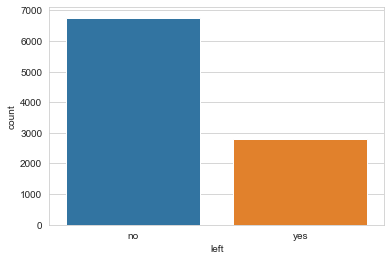

In [10]:
sns.countplot(df['left'])

In [27]:
#current turnover rate

x = 2784/df.shape[0]
x*100

29.18238993710692

- The current employee turnover rate is about **29.2%**

In [37]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(str(column) + ":" +str(df[column].unique()))
        print(df[column].value_counts())
        print("----------------------------")

department:['operations' 'support' 'logistics' 'sales' 'IT' 'admin' 'engineering'
 'marketing' 'finance' 'retail']
sales          1883
retail         1541
operations     1522
engineering    1516
marketing       802
support         735
admin           423
finance         402
logistics       360
IT              356
Name: department, dtype: int64
----------------------------
salary:['low' 'medium' 'high']
medium    6611
high      1548
low       1381
Name: salary, dtype: int64
----------------------------
left:['no' 'yes']
no     6756
yes    2784
Name: left, dtype: int64
----------------------------


In [ ]:
ndf = [col for col in df.columns if df[col].dtype == 'int64' or df[col].dtype == 'float64' ]
ndf

['promoted',
 'review',
 'projects',
 'tenure',
 'satisfaction',
 'bonus',
 'avg_hrs_month']

In [ ]:
"""function to remove outliers"""

def remove_outliers(column):

    q25, q50, q75 = np.percentile(df[column], [25, 70, 75])
    iqr = q75 - q25
    min = q25 - 1.5 * (iqr)
    max = q75 + 1.5 * (iqr)
    
    outliers = [x for x in df[column] if x > max or x < min]
    
    return outliers
    
outliers = remove_outliers('avg_hrs_month') 
print(outliers)

for i, val in enumerate(df['avg_hrs_month'].values):
    if val in outliers:
        df.iloc[i , 8] = df['avg_hrs_month'].mean()

[171.37406048199938, 197.49716735827883, 198.58225073488904, 200.8616558715116, 198.16413006690684, 197.29022422768563, 199.2977749953616, 197.45937113906496, 197.91514846933853, 197.5501805684017, 197.2560230970748, 198.16681940068608, 197.7673401554386, 199.3772726528759, 197.69855193886923, 197.55928314256664]


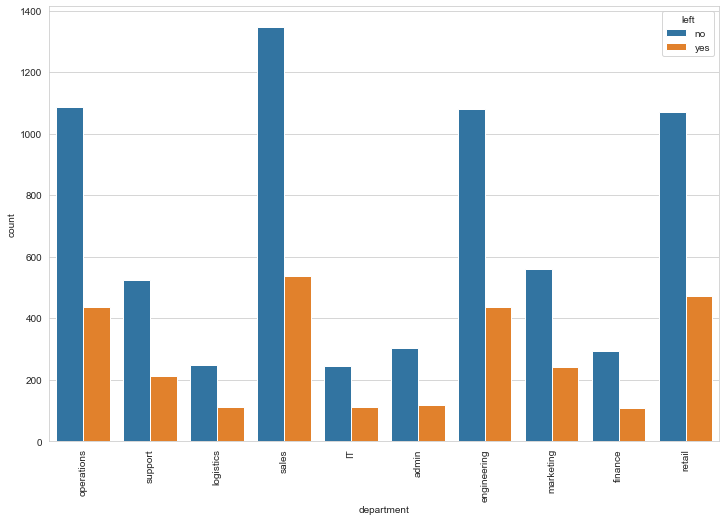

In [60]:
plt.subplots(figsize = (12,8))
sns.countplot(df['department'], hue = 'left', data = df)

plt.xticks(rotation = 90)
plt.show()

In [ ]:
dep_counts = df['department'].value_counts().to_frame()
dep_counts.head()

,department
sales,1883
retail,1541
operations,1522
engineering,1516
marketing,802


In [ ]:
departments = df['department'].unique()

for department in departments:
	print(dep_counts.loc[department])

department    1522
Name: operations, dtype: int64
department    735
Name: support, dtype: int64
department    360
Name: logistics, dtype: int64
department    1883
Name: sales, dtype: int64
department    356
Name: IT, dtype: int64
department    423
Name: admin, dtype: int64
department    1516
Name: engineering, dtype: int64
department    802
Name: marketing, dtype: int64
department    402
Name: finance, dtype: int64
department    1541
Name: retail, dtype: int64


In [ ]:
mydf = df[['department', 'left']]
mydf = mydf.set_index('department')

departments = df['department'].unique()


In [ ]:
mydf

,left
department,
operations,no
operations,no
support,no
logistics,no
sales,no
...,...
operations,yes
logistics,yes
operations,yes


In [ ]:
for department in departments:
    print(department, mydf.loc[department].count())


operations left    1522
dtype: int64
support left    735
dtype: int64
logistics left    360
dtype: int64
sales left    1883
dtype: int64
IT left    356
dtype: int64
admin left    423
dtype: int64
engineering left    1516
dtype: int64
marketing left    802
dtype: int64
finance left    402
dtype: int64
retail left    1541
dtype: int64


In [ ]:
for department in departments:
    print(department, dep_counts.loc[department])

operations department    1522
Name: operations, dtype: int64
support department    735
Name: support, dtype: int64
logistics department    360
Name: logistics, dtype: int64
sales department    1883
Name: sales, dtype: int64
IT department    356
Name: IT, dtype: int64
admin department    423
Name: admin, dtype: int64
engineering department    1516
Name: engineering, dtype: int64
marketing department    802
Name: marketing, dtype: int64
finance department    402
Name: finance, dtype: int64
retail department    1541
Name: retail, dtype: int64


In [ ]:
countdict = {'operations': 436/1522, 'support' :212/735, 'logistics': 111/360,'sales': 537/1883, 'IT': 110/356, 'admin' : 119/423, 'engineering': 437/1516, 'marketing':243/802, 'finance': 108/402, 'retail' : 471/1541}

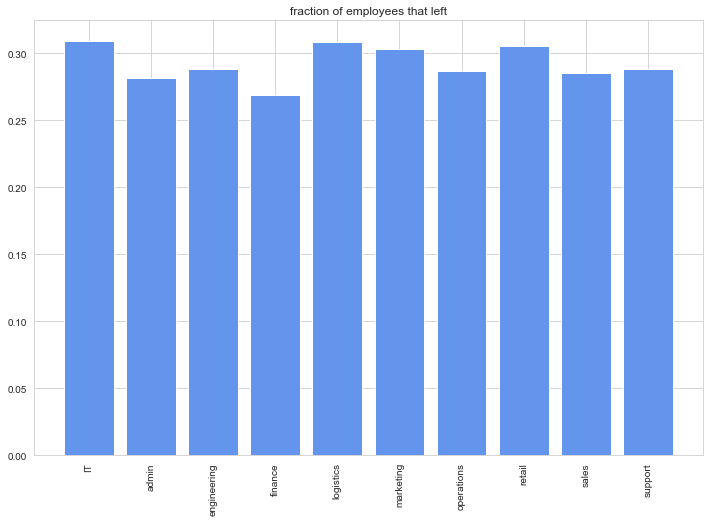

In [ ]:
myList = countdict.items()
myList = sorted(myList)
x, y = zip(*myList)

plt.subplots(figsize = (12,8))
plt.xticks(rotation = 90)
plt.bar(x,y, color = 'cornflowerblue')
plt.title('fraction of employees that left')
plt.show()

- The highest fractions of turnovers i.e. the number of employees that left / total number of employees is the greatest in the IT department. Followed by logistics and retail and marketing.  

In [130]:
xdf = df[['department', 'left']]
xdf['left'] = xdf[xdf['left'] == 'yes']

countdf = xdf.value_counts()
countdf

department   left       
sales        sales          537
retail       retail         471
engineering  engineering    437
operations   operations     436
marketing    marketing      243
support      support        212
admin        admin          119
logistics    logistics      111
IT           IT             110
finance      finance        108
dtype: int64

In [133]:
countdf = countdf.to_frame()

In [134]:
countdf.head()

,,0
department,left,
sales,sales,537
retail,retail,471
engineering,engineering,437
operations,operations,436
marketing,marketing,243


In [136]:
countdf = countdf.reset_index()

In [137]:
countdf = countdf.drop('left', axis = 1)
countdf.head()

,department,0
0,sales,537
1,retail,471
2,engineering,437
3,operations,436
4,marketing,243


In [141]:
countdf = countdf.rename(columns = {0: "number of employees that left"})
countdf

,department,number of employees that left
0,sales,537
1,retail,471
2,engineering,437
3,operations,436
4,marketing,243
5,support,212
6,admin,119
7,logistics,111
8,IT,110
9,finance,108


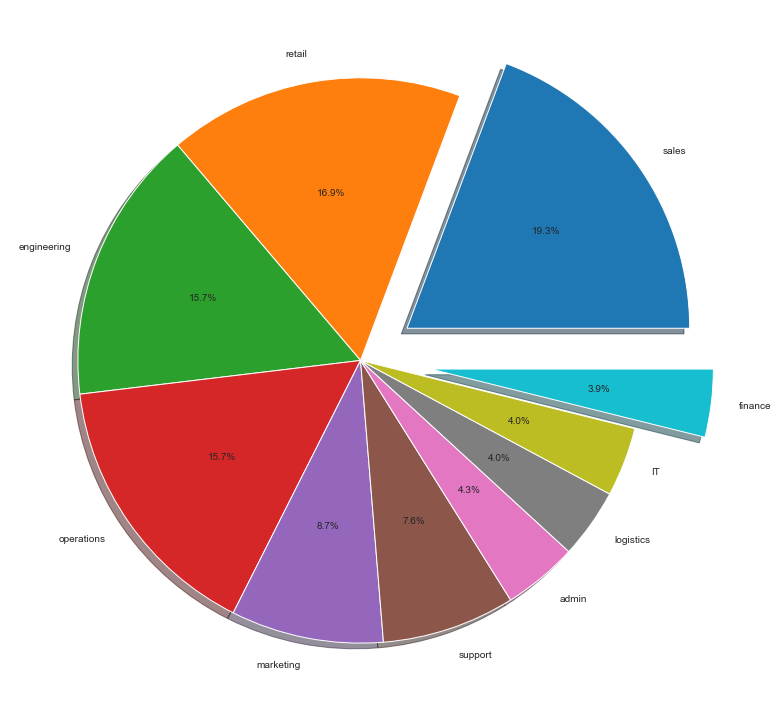

In [168]:
plt.figure(figsize = (13, 13))
explode = (0.2, 0, 0,0, 0, 0, 0,0,0,0.25)
plt.pie(countdf['number of employees that left'], labels = countdf['department'].unique(), autopct='%1.1f%%', explode = explode, shadow = True)
plt.show()

- The department producing the highest number of employee turnovers is *sales*. Whereas the department producing the least number is *finance*. 

In [147]:
salesdf = df[df.department == 'sales']
salesdf.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no
8,sales,0,0.652818,4,low,6.0,0.678696,0,183.655790,no
9,sales,0,0.642031,3,medium,6.0,0.623365,0,181.851000,no
14,sales,0,0.567449,3,medium,6.0,0.845246,0,181.756584,no
20,sales,0,0.669777,2,medium,7.0,0.511351,0,185.827078,no


In [11]:
descsales = salesdf.describe()
descsales

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,0.026553,0.651631,3.286245,6.535847,0.504520,0.211896,184.581474
std,0.160817,0.085321,0.583475,1.434420,0.157836,0.408760,4.161161
min,0.000000,0.371396,2.000000,3.000000,0.000000,0.000000,172.740351
25%,0.000000,0.592977,3.000000,5.000000,0.390177,0.000000,181.264139
50%,0.000000,0.646179,3.000000,7.000000,0.500174,0.000000,184.606307
75%,0.000000,0.707134,4.000000,8.000000,0.621886,0.000000,187.694054
max,1.000000,1.000000,5.000000,11.000000,0.950657,1.000000,197.008785


In [155]:
descsales.loc['mean']

promoted           0.026553
review             0.651631
projects           3.286245
tenure             6.535847
satisfaction       0.504520
bonus              0.211896
avg_hrs_month    184.581474
Name: mean, dtype: float64

In [ ]:
descsales = descsales.head().T.drop('count', axis = 1)

In [188]:
findf = df[df.department == 'finance']
findf.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
15,finance,0,0.582651,3,medium,6.0,0.608027,0,184.029011,no
70,finance,0,0.606415,3,medium,5.0,0.623611,0,180.534715,no
90,finance,0,0.756007,4,medium,5.0,0.570239,1,180.024182,no
111,finance,0,0.691052,3,medium,6.0,0.492389,0,181.916976,no
142,finance,0,0.646466,3,medium,5.0,0.642770,0,180.413538,no


In [189]:
findf = findf.drop(['department', 'avg_hrs_month'], axis = 1)

In [158]:
descfin = findf.describe()
descfin.loc['mean']

promoted        0.047264
review          0.654934
projects        3.293532
tenure          6.440299
satisfaction    0.497183
bonus           0.231343
Name: mean, dtype: float64

In [ ]:
descfin = descfin.head().T.drop('count', axis = 1)

In [ ]:
descsales = descsales.drop('avg_hrs_month')

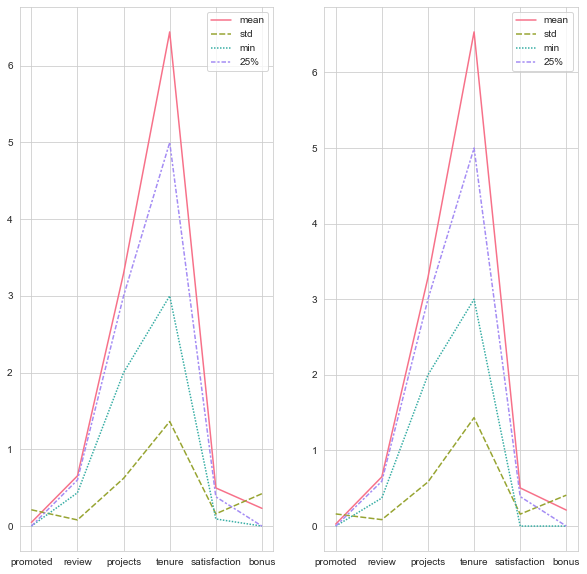

In [ ]:
f, axes = plt.subplots(1,2, figsize = (10,10))

sns.lineplot(data = descfin, palette = 'husl', ax = axes[0])
sns.lineplot(data = descsales, palette = 'husl', ax = axes[1])

plt.show()


- There does not seem to be other significant differences in the mean of other variables between the two departments, according to the line plots. 

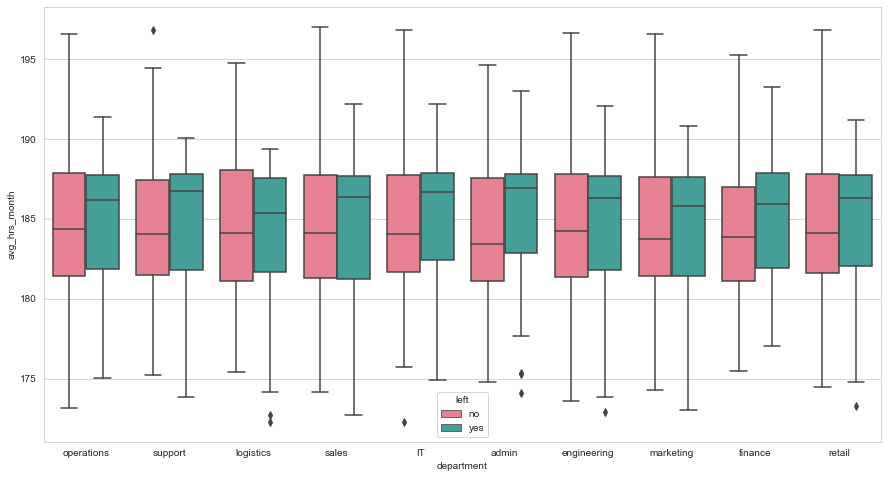

In [ ]:
plt.subplots(figsize = (15, 8))
sns.boxplot(x = 'department', y = 'avg_hrs_month', data = df, hue = 'left', palette = 'husl')
plt.show()

- It can be noted from the above boxplots, that the values for average hours a month are slightly over the mean in case of employees left.

In [ ]:
round((findf.describe() - salesdf.describe())*100, 3)

,avg_hrs_month,bonus,projects,promoted,review,satisfaction,tenure
count,NaN,-148100.000,-148100.000,-148100.000,-148100.000,-148100.000,-148100.000
mean,NaN,1.945,0.729,2.071,0.330,-0.734,-9.555
std,NaN,1.346,3.897,5.165,-0.517,0.179,-7.133
min,NaN,0.000,0.000,0.000,6.343,9.275,0.000
25%,NaN,0.000,0.000,0.000,0.843,-0.819,0.000
50%,NaN,0.000,0.000,0.000,1.273,-1.031,-100.000
75%,NaN,0.000,0.000,0.000,0.232,0.051,-100.000
max,NaN,0.000,0.000,0.000,-12.199,-3.745,0.000


- The most signifant attribute differences between the departments producing the most and the least turnovers is *average number of hours worked in a month*

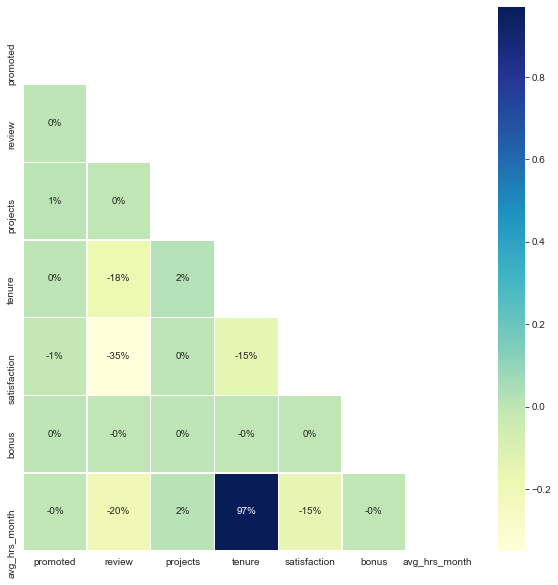

In [156]:
corr_df = df.corr()
mask = np.triu(np.ones_like(corr_df, dtype = bool))
plt.figure(figsize = (10, 10))
cols = corr_df.index
sns.heatmap(df[cols].corr(), mask = mask, annot = True, linewidths = 0.4, cmap = 'YlGnBu', fmt = '.0%')
plt.show()

In [46]:
df2 = df.copy()
df2 = df2.drop('department', axis = 1)
df2.head()

,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [47]:
from sklearn.preprocessing import LabelEncoder

for column in df2.columns:
    if df2[column].dtype == np.number:
        continue
    df2[column] = LabelEncoder().fit_transform(df2[column])
    
df2.head()

,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,0,0.577569,1,1,5.0,0.626759,0,180.866070,0
1,0,0.751900,1,2,6.0,0.443679,0,182.708149,0
2,0,0.722548,1,2,6.0,0.446823,0,184.416084,0
3,0,0.675158,2,0,8.0,0.440139,0,188.707545,0
4,0,0.676203,1,0,5.0,0.577607,1,179.821083,0


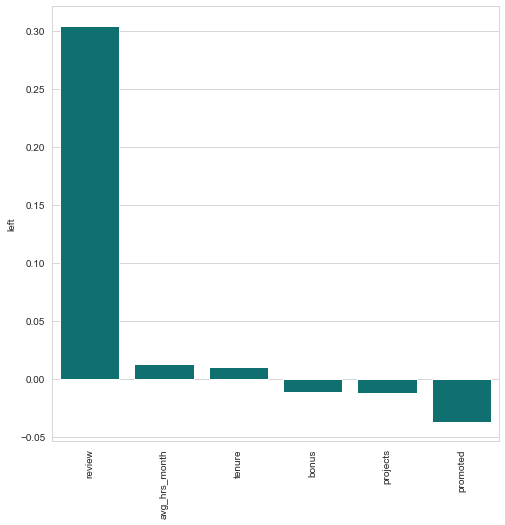

In [49]:
corr_df = df2.corr()['left'].sort_values(ascending = False)[1:]
corr_df = corr_df[abs(corr_df) > 0.01]

plt.figure(figsize = (8, 8))
sns.barplot(x = corr_df.index, y = corr_df, color = 'teal')
plt.xticks(rotation = 90)
plt.show()

In [51]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [52]:
Xs = df2.drop('left', axis = 1)
ys = df2['left']
X_train, X_test, y_train, y_test = train_test_split(Xs, ys)

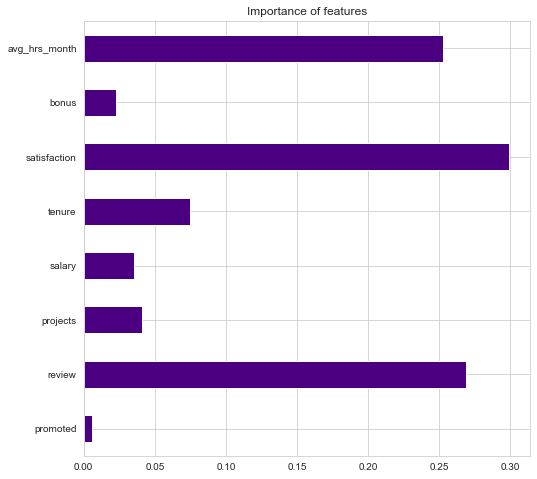

In [53]:
from sklearn.ensemble import ExtraTreesRegressor

reg= ExtraTreesRegressor()
reg.fit(X_train,y_train)
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
plt.figure(figsize = (8,8))
feat_importances.plot(kind='barh', color = 'indigo')
plt.title('Importance of features')
plt.show()

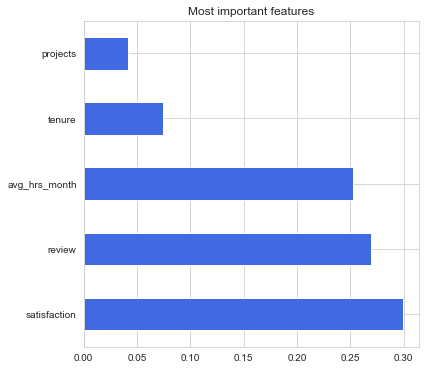

In [54]:
plt.figure(figsize = (6,6))
feat_importances.nlargest(5).plot(kind='barh', color = 'royalblue')
plt.title('Most important features')
plt.show()

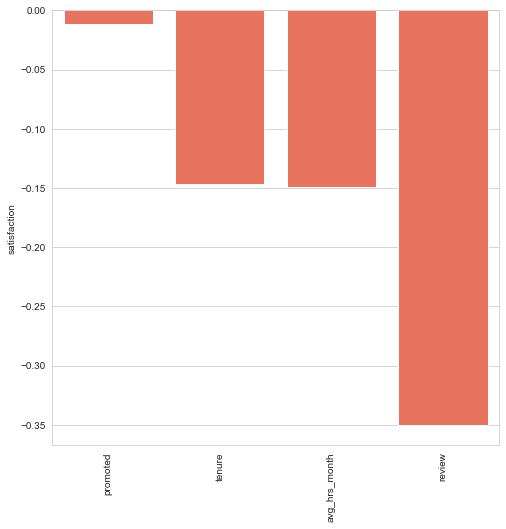

In [116]:
corr_df = df2.corr()['satisfaction'].sort_values(ascending = False)[1:]
corr_df = corr_df[abs(corr_df) > 0.01]

plt.figure(figsize = (8, 8))
sns.barplot(x = corr_df.index, y = corr_df, color = 'tomato')
plt.xticks(rotation = 90)
plt.show()

### Findings:

The five most important variables for predicting employee departure are: 
- satisfaction
- review
- projects
- tenure
- avg hours worked in a month

We have found out that employee satisfation is what plays the greatest role in turnovers. 

Furthermore, looking into the factors influencing factors affecting employee satisfaction, the factors seem to be primarily negatively correlated with employee satisfaction. The largest influencing factor being *review*, followed by average hours a month and tenure. 

### Prevention is better than cure. Creating models to predict employee turnovers

In [ ]:
dt = DecisionTreeClassifier(random_state=42, criterion="entropy")
params = {
    'max_depth': np.arange(1, 30),
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(X_train, y_train)
score_df = pd.DataFrame(grid_search.cv_results_)
print(grid_search.best_estimator_)

Fitting 4 folds for each of 290 candidates, totalling 1160 fits
DecisionTreeClassifier(max_depth=12, min_samples_leaf=20, random_state=42)


In [ ]:
models = [('lr', LogisticRegression(C= 100)), ('svm', SVC(C = 1, degree = 1)), 
          ('dtc', DecisionTreeClassifier(criterion = 'entropy', max_depth=15, min_samples_leaf=10, random_state=42))]

In [ ]:
def fit_and_score(model, X_train, y_train):
    """ Function to print out the relevant classification metrics"""
    
    steps = [model]
    pipeline = Pipeline(steps)
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", cr)
    print("======================================================\n")

In [ ]:
for model in models:
    print(model[1] ,'\n')
    print(fit_and_score(model, X_train, y_train))

LogisticRegression(C=100) 

Confusion Matrix:
 [[1566  110]
 [ 545  164]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.93      0.83      1676
           1       0.60      0.23      0.33       709

    accuracy                           0.73      2385
   macro avg       0.67      0.58      0.58      2385
weighted avg       0.70      0.73      0.68      2385


None
SVC(C=1, degree=1) 

Confusion Matrix:
 [[1676    0]
 [ 709    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.83      1676
           1       0.00      0.00      0.00       709

    accuracy                           0.70      2385
   macro avg       0.35      0.50      0.41      2385
weighted avg       0.49      0.70      0.58      2385


None
DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=10,
                       random_state=42) 

Confusion Matrix:
 [[152

Here, we have good-looking models that can predict on the basis of the given attributes if the employees have left or not. It can also give you the probability of the the employees leaving the company on the basis of the given attributes. 

The best model to use would be the Decision Tree Classifier as is prominent through its accuracy scores. 

In [ ]:
new_xs = df2.drop('left', axis = 1)
new_xs

,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month
0,0,0.577569,1,1,5.0,0.626759,0,180.866070
1,0,0.751900,1,2,6.0,0.443679,0,182.708149
2,0,0.722548,1,2,6.0,0.446823,0,184.416084
3,0,0.675158,2,0,8.0,0.440139,0,188.707545
4,0,0.676203,1,0,5.0,0.577607,1,179.821083
...,...,...,...,...,...,...,...,...
9535,0,0.610988,2,2,8.0,0.543641,0,188.155738
9536,0,0.746887,1,2,8.0,0.549048,0,188.176164
9537,0,0.557980,1,1,7.0,0.705425,0,186.531008
9538,0,0.584446,2,2,8.0,0.607287,1,187.641370


In [ ]:
new_xs['avg_hrs_month'] = new_xs['avg_hrs_month'] - 10
new_xs

,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month
0,0,0.577569,1,1,5.0,0.626759,0,170.866070
1,0,0.751900,1,2,6.0,0.443679,0,172.708149
2,0,0.722548,1,2,6.0,0.446823,0,174.416084
3,0,0.675158,2,0,8.0,0.440139,0,178.707545
4,0,0.676203,1,0,5.0,0.577607,1,169.821083
...,...,...,...,...,...,...,...,...
9535,0,0.610988,2,2,8.0,0.543641,0,178.155738
9536,0,0.746887,1,2,8.0,0.549048,0,178.176164
9537,0,0.557980,1,1,7.0,0.705425,0,176.531008
9538,0,0.584446,2,2,8.0,0.607287,1,177.641370


In [ ]:
def fit_and_predict(model, X_train, y_train):
    """ Function to print out the relevant classification metrics"""
    
    steps = [model]
    pipeline = Pipeline(steps)
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(new_xs)
    
    print((y_pred.sum()/ len(new_xs))*100)
    
for model in models:
    print(model[1] ,'\n')
    print(fit_and_predict(model, X_train, y_train))

LogisticRegression(C=100) 

31.740041928721176
None
SVC(C=1, degree=1) 

0.0
None
DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=10,
                       random_state=42) 

19.79035639412998
None


According to the predictions of out Decision Tree Classifier model, the employee turnover rates is 19.81%, decreasing by about 10% when the average number of hours worked are reduced by 10 hours. This is a significant discovery. 